## importing liberary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import ruptures as rpt
#import pymc as pm

In [2]:
import warnings
warnings.filterwarnings('ignore')

## file reading

In [3]:
# Load data
data = pd.read_csv('../data/raw/Copy of BrentOilPrices.csv')

In [4]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [5]:
print(data.columns)


Index(['Date', 'Price'], dtype='object')


In [6]:
print(data.head())


        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
# Convert 'Date' column to datetime, letting pandas infer the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'errors=coerce' will set invalid dates to NaT

# Rename 'Date' column to 'date'
data.rename(columns={'Date': 'date'}, inplace=True)

# Sort by 'date' and set it as the index
data = data.sort_values(by='date')
data = data.set_index('date')

# Preprocess the data
data['Price'] = data['Price'].interpolate()

In [8]:
data

,Price
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [9]:
# Ensure consistency of data types
data['Price'] = data['Price'].astype(float)

# Save processed data

In [10]:
# Save processed data
data.to_csv('../data/processed/processed_brent_oil_prices.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


## External data

In [12]:
df1 = pd.read_csv('../data/external/World Development Indicators 2/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_9865.csv')

In [13]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,9.796900e+11,8.992960e+11,8.298300e+11,9.401050e+11,1.012720e+12,1.006530e+12,9.290740e+11,1.086770e+12,1.183960e+12,1.236160e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,8.945850e+11,7.693670e+11,6.921810e+11,6.857500e+11,7.681900e+11,8.239340e+11,7.871470e+11,8.459930e+11,8.771410e+11,7.965860e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.472296e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.043835e+10
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.382910e+11,4.201180e+11,4.052710e+11,3.777820e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.816263e+10


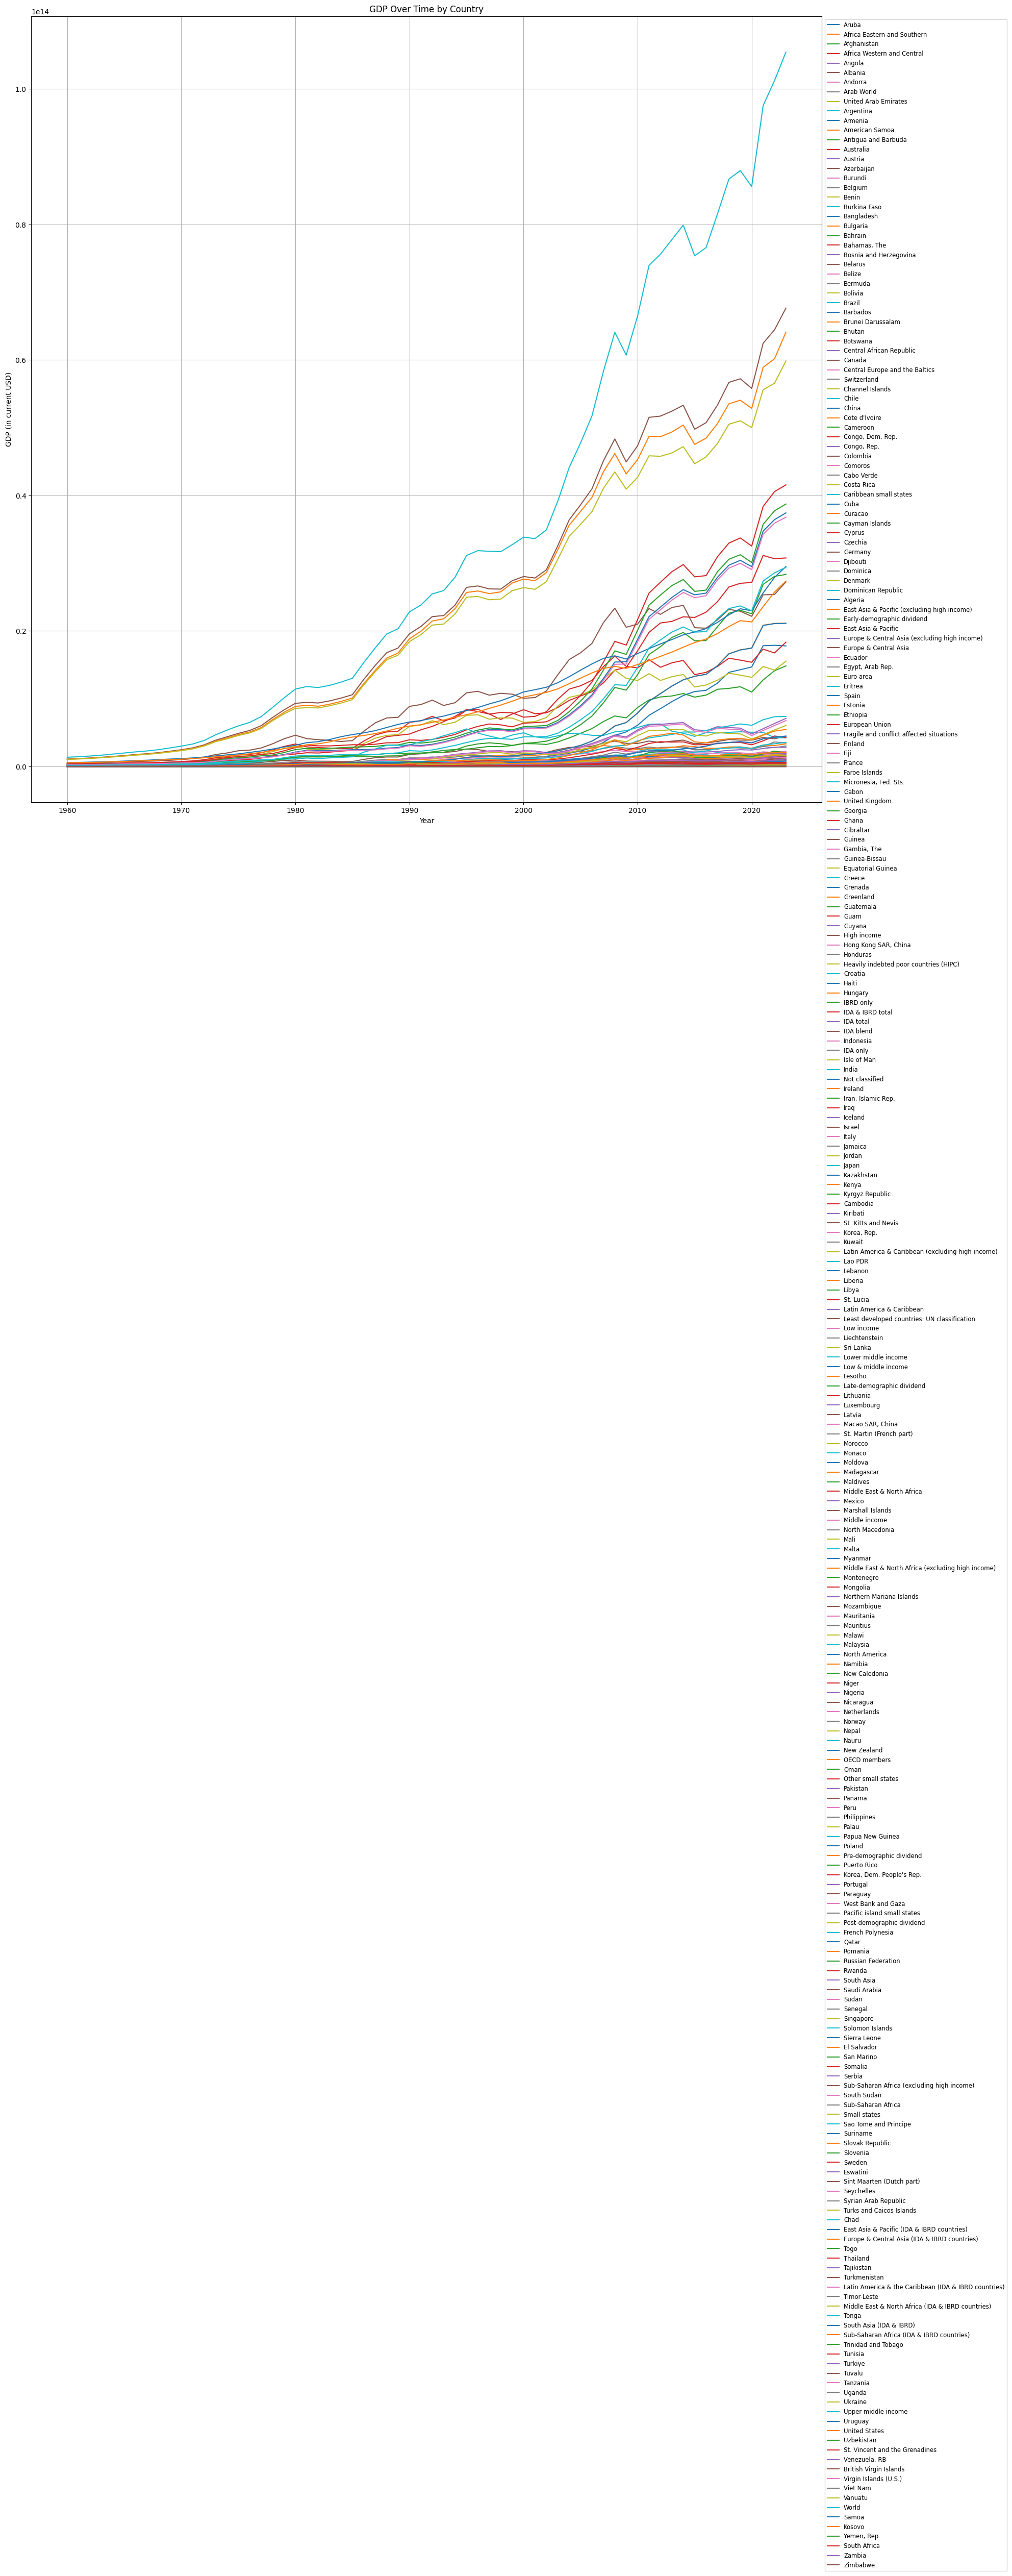

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset to include only rows related to GDP
gdp_data = df1[df1['Indicator Name'] == 'GDP (current US$)']

# Extract the years from the columns starting after the metadata columns
years = gdp_data.columns[4:].astype(int)

# Initialize the plot
plt.figure(figsize=(16, 20))

# Loop over each country in the GDP dataset
for _, row in gdp_data.iterrows():
    country_name = row['Country Name']
    gdp_values = row[4:].values  # Extract GDP values for each year
    plt.plot(years, gdp_values, label=country_name)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('GDP (in current USD)')
plt.title('GDP Over Time by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize='small')
plt.grid(True)
plt.tight_layout()  # Adjust layout for readability

# Show plot
plt.show()

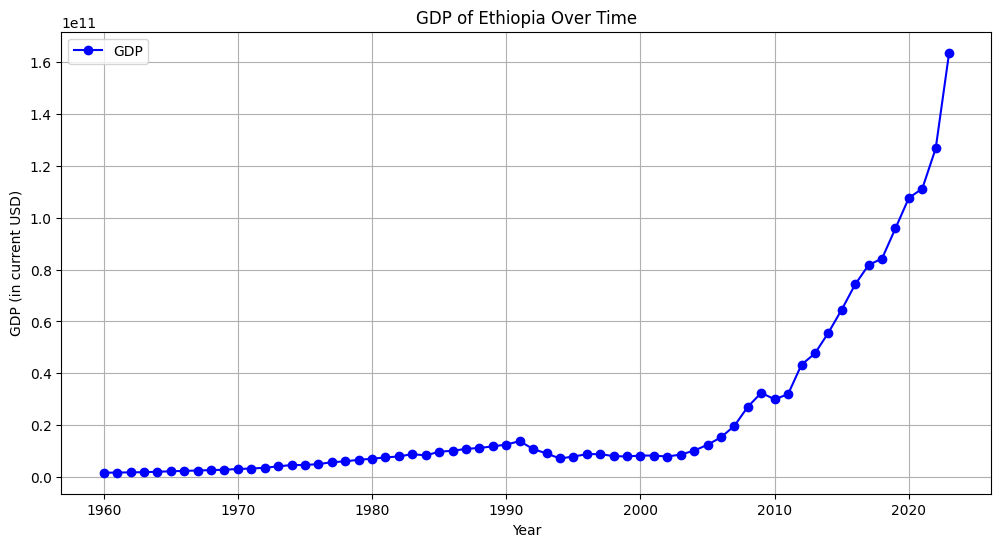

In [18]:
# Ensure the correct GDP indicator is selected for Ethiopia
ethiopia_gdp = df1[(df1['Country Name'] == 'Ethiopia') & (df1['Indicator Name'] == 'GDP (current US$)')]

# Check if any data was retrieved for GDP specifically
if ethiopia_gdp.empty:
    print("No GDP data found for Ethiopia. Please check if 'GDP (current US$)' is the correct indicator name.")
else:
    # Extract the years and GDP values
    years = ethiopia_gdp.columns[4:]  # Assuming first 4 columns are metadata, adjust if needed
    gdp_values = ethiopia_gdp[years].values.flatten()  # Flatten to get a 1D array of GDP values

    # Convert years to integers for plotting
    years = years.astype(int)

    # Plotting the GDP data over time
    plt.figure(figsize=(12, 6))
    plt.plot(years, gdp_values, marker='o', color='b', label='GDP')
    plt.xlabel('Year')
    plt.ylabel('GDP (in current USD)')
    plt.title('GDP of Ethiopia Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
# Select rows where 'Country Name' is 'Ethiopia'
ethiopia_data = df1[df1['Country Name'] == 'Ethiopia']
ethiopia_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
72,Ethiopia,ETH,GDP (current US$),NY.GDP.MKTP.CD,1.610512e+09,1.680860e+09,1.747566e+09,1.825059e+09,1.984129e+09,2.159999e+09,...,5.561223e+10,6.458933e+10,7.429675e+10,8.177089e+10,8.426920e+10,9.591261e+10,1.076580e+11,1.112620e+11,1.267730e+11,1.636980e+11
